In [1]:
#Import Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [2]:
# Read the contents of the BRCA1 mutations csv file into a data frame
training_variants_BRCA1 = pd.read_csv('/home/bharat/Desktop/CS_631_Final_Project/msk-redefining-cancer-treatment/PMI_computation_gene_variant_relation/list_of_docs_BRCA1.csv')

In [3]:
training_variants_BRCA1.head(10)

,2417,BRCA1,E1735K,6
0,2418,BRCA1,R1753T,4
1,2419,BRCA1,C44Y,4
2,2420,BRCA1,R1835P,1
3,2421,BRCA1,Truncating Mutations,1
4,2422,BRCA1,G1803A,1
5,2423,BRCA1,A1830T,5
6,2424,BRCA1,G1743R,1
7,2425,BRCA1,I68K,6
8,2426,BRCA1,C64G,4
9,2427,BRCA1,S4P,6


In [4]:
training_variants_BRCA1_list= training_variants_BRCA1.values.tolist()

In [5]:
print(training_variants_BRCA1_list[2])

[2420, 'BRCA1', 'R1835P', 1]


In [6]:
# Create pairs of mutations of the BRCA1 gene and designate the pair as 1 if the mutations belong to the same
# class of 0 otherwise
combination_mutation_pairs_BRCA1={}
for i in range(len(training_variants_BRCA1_list)-1):
    for j in range(i+1,len(training_variants_BRCA1_list)):
        if training_variants_BRCA1_list[i][3]==training_variants_BRCA1_list[j][3]:
            combination_mutation_pairs_BRCA1[str(training_variants_BRCA1_list[i][2])+'-'+str(training_variants_BRCA1_list[j][2])]=[1]
        else:
            combination_mutation_pairs_BRCA1[str(training_variants_BRCA1_list[i][2])+'-'+str(training_variants_BRCA1_list[j][2])]=[0]
print(len(combination_mutation_pairs_BRCA1))

34453


In [7]:
#"Return first n items of the iterable as a list"
from itertools import islice

def take(n, iterable):
    return list(islice(iterable, n))

In [8]:
# Print 50 items from the mutation pairs list 
n_items = take(50, combination_mutation_pairs_BRCA1.items())
print(n_items)

[('R1753T-C44Y', [1]), ('R1753T-R1835P', [0]), ('R1753T-Truncating Mutations', [0]), ('R1753T-G1803A', [0]), ('R1753T-A1830T', [0]), ('R1753T-G1743R', [0]), ('R1753T-I68K', [0]), ('R1753T-C64G', [1]), ('R1753T-S4P', [0]), ('R1753T-K50L', [0]), ('R1753T-Y105C', [0]), ('R1753T-L63F', [0]), ('R1753T-L1407P', [0]), ('R1753T-L1657P', [0]), ('R1753T-F79S', [0]), ('R1753T-D1778H', [0]), ('R1753T-D1546N', [0]), ('R1753T-M1689T', [0]), ('R1753T-D96N', [0]), ('R1753T-W1837C', [0]), ('R1753T-Deletion', [0]), ('R1753T-P1856S', [0]), ('R1753T-F1761I', [0]), ('R1753T-A1823T', [0]), ('R1753T-I1807S', [0]), ('R1753T-K38N', [0]), ('R1753T-S1651P', [0]), ('R1753T-L246V', [0]), ('R1753T-V191I', [0]), ('R1753T-T37R', [1]), ('R1753T-D1818G', [0]), ('R1753T-S72R', [0]), ('R1753T-Y179C', [0]), ('R1753T-C39Y', [1]), ('R1753T-K45N', [0]), ('R1753T-L52F', [0]), ('R1753T-H1746N', [0]), ('R1753T-P1749R', [1]), ('R1753T-H1746Q', [0]), ('R1753T-I21V', [0]), ('R1753T-W1718C', [1]), ('R1753T-R170W', [0]), ('R1753T-T7

In [9]:
print(combination_mutation_pairs_BRCA1['R1753T-E29V'])

[0]


In [10]:
#Create a list containing all the mutations of the BRCA1 gene present in the training dataset
BRCA1_Mutation_List=[]
for i in range(len(training_variants_BRCA1_list)):
    BRCA1_Mutation_List.append(training_variants_BRCA1_list[i][2])
print(len(BRCA1_Mutation_List))   

263


In [11]:
print(BRCA1_Mutation_List)  

['R1753T', 'C44Y', 'R1835P', 'Truncating Mutations', 'G1803A', 'A1830T', 'G1743R', 'I68K', 'C64G', 'S4P', 'K50L', 'Y105C', 'L63F', 'L1407P', 'L1657P', 'F79S', 'D1778H', 'D1546N', 'M1689T', 'D96N', 'W1837C', 'Deletion', 'P1856S', 'F1761I', 'A1823T', 'I1807S', 'K38N', 'S1651P', 'L246V', 'V191I', 'T37R', 'D1818G', 'S72R', 'Y179C', 'C39Y', 'K45N', 'L52F', 'H1746N', 'P1749R', 'H1746Q', 'I21V', 'W1718C', 'R170W', 'T77M', 'V1713A', 'V1833M', 'S1101N', 'T1691I', 'L147F', 'H1421Y', 'E362H', 'R170Q', 'S1715C', 'E1794D', 'L358R', 'S308A', 'V1741G', 'R1699L', 'V1804A', 'E23fs', 'F1734S', 'C61G', 'D245V', 'P142H', 'L1705P', 'H1686R', 'P1776S', 'M1783T', 'S1841R', 'V1534M', 'W1782C', 'G1706A', 'G1788V', 'W1837G', 'A1708E', 'S1512I', 'M1783I', 'E1682V', 'M1783L', 'G1706E', 'R496C', 'S153R', 'N810Y', 'K1702E', 'A1789S', 'R866C', 'V11A', 'D1739V', 'M1775E', 'D67Y', 'D1344H', 'V271L', 'S1841N', 'F1761S', 'E1586G', 'S1841A', 'I89N', 'L82P', 'P798L', 'E29V', 'M1775K', 'E1060A', 'I90T', 'I15T', 'V1736G', '

In [12]:
# Remove Truncating Mutations as they are generic in nature
BRCA1_Mutation_List.remove('Truncating Mutations')
BRCA1_Mutation_List.remove('Deletion')

In [13]:
# Create a list of tuples of all mutation pairs of the BRCA1 gene
BRCA1_Mutation_Tuples=[]
for i in range(0,len(BRCA1_Mutation_List)-1):
    for j in range(i+1,len(BRCA1_Mutation_List)):
        BRCA1_Mutation_Tuples.append((BRCA1_Mutation_List[i],BRCA1_Mutation_List[j]))

In [14]:
print(len(BRCA1_Mutation_Tuples))
print(BRCA1_Mutation_Tuples[10])

33930
('R1753T', 'L63F')


In [15]:
import findspark
findspark.init('/home/bharat/spark-3.1.1-bin-hadoop2.7')

In [16]:
# Create a Sparkcontext
import pyspark
from pyspark import SparkContext, SparkConf

spark_conf = SparkConf()\
  .setAppName("YourTest")\
  .setMaster("local[*]")

sc = SparkContext.getOrCreate(spark_conf)

In [17]:
# Compute the Occurence-Probabilities of Mutations in Research Literature

def doc_mutation_occurence_probabilities():
    # "training_text_BRCA1.txt" is the document that contains all the papers associated with the BRCA1 mutations
    # in the training dataset. There are 264 such papers.
    document="training_text_BRCA1.txt"

    def unique(list1): 
  
    # intilize a null list 
        unique_list = [] 
      
    # traverse for all elements 
        for x in list1: 
            # check if x exists in unique_list or not 
            if x not in unique_list: 
                unique_list.append(x) 
        return unique_list
  
    # Count the number of lines in the document (in this case, each document is a line so line 
    # count is in effect document count)
    line_count = sc.textFile(document).map(lambda s: 1).reduce(lambda a,b: a+b)
    line_count=int(line_count)

    # Compute the occurence of each mutation in the combined research paper document, in effect this means
    # the number of documents in which the mutation occurs atleast once
    word_occurence = sc.textFile(document).flatMap(lambda line: unique(word_tokenize(line))).map(lambda x:(x,1) if x in BRCA1_Mutation_List else (x,0)).reduceByKey(lambda a, b: a + b).collect()

    # Compute the probability of occurrence of a mutation per document in the combined document
    word_occurence_prob = sc.textFile(document).flatMap(lambda line: unique(word_tokenize(line))).map(lambda x:(x,1) if x in BRCA1_Mutation_List else (x,0)).reduceByKey(lambda a, b: a + b).filter(lambda x: x[1]>0).map(lambda a : (a[0],a[1]/line_count)).collect()
    variant_occurence = [x for x in word_occurence if x[0] in BRCA1_Mutation_List]
    variant_prob=[x for x in word_occurence_prob if x[0] in BRCA1_Mutation_List]

    # return the list of mutations in the decreasing order of magnitude of the probabilities of their occurrence
    return (sorted(variant_prob,key=lambda x:(-x[1],x[0])))


In [18]:
doc_mutation_occurence_probabilities()

[('S1655F', 0.7857142857142857),
 ('R1699W', 0.7255639097744361),
 ('G1706A', 0.7142857142857143),
 ('A1708E', 0.706766917293233),
 ('V1736A', 0.6578947368421053),
 ('G1706E', 0.6353383458646616),
 ('W1718C', 0.5789473684210527),
 ('R1699Q', 0.5639097744360902),
 ('C61G', 0.5225563909774437),
 ('C64G', 0.48120300751879697),
 ('P142H', 0.47368421052631576),
 ('Y105C', 0.47368421052631576),
 ('G1788V', 0.43609022556390975),
 ('I1766S', 0.43609022556390975),
 ('V1833M', 0.42105263157894735),
 ('A1752P', 0.41729323308270677),
 ('M1783T', 0.41729323308270677),
 ('V1808A', 0.41729323308270677),
 ('V1809F', 0.41729323308270677),
 ('M1775K', 0.40225563909774437),
 ('A1843P', 0.39849624060150374),
 ('C1697R', 0.39849624060150374),
 ('G1656D', 0.39849624060150374),
 ('H1746N', 0.39849624060150374),
 ('R1699L', 0.39849624060150374),
 ('W1837G', 0.39849624060150374),
 ('M18T', 0.38345864661654133),
 ('V1804D', 0.38345864661654133),
 ('P1806A', 0.37593984962406013),
 ('T1720A', 0.37218045112781956)

In [19]:
# Function to determine whether two mutations in a tuple pair occur in the same document or not
def tuple_update(tokenized_line):
    tuplst=[]
    for i in range (len(BRCA1_Mutation_Tuples)):
        if BRCA1_Mutation_Tuples[i][0] in tokenized_line and BRCA1_Mutation_Tuples[i][1] in tokenized_line:
            tuplst.append([BRCA1_Mutation_Tuples[i],1])
        else:
            continue
            
    return tuplst        

In [20]:
# Function to compute the PMI of mutation pairs (a line here refers to a whole document)  

from math import log

def PMI():
  
    document="training_text_BRCA1.txt"

    def computation(threshold_val):
    
        def unique(list1): 

          # intilize a null list 
          unique_list = [] 

          # traverse for all elements 
          for x in list1: 
              # check if x exists in unique_list or not 
              if x not in unique_list: 
                  unique_list.append(x) 
          return unique_list

        def word_count(word,word_tuple_list):
          count=0
          for i in range(len(word_tuple_list)):
            if word_tuple_list[i][0]==word:
              count=word_tuple_list[i][1]
          return count

        line_count = sc.textFile(document).map(lambda s: 1).reduce(lambda a,b: a+b)
        line_count=int(line_count)

        word_occurence = sc.textFile(document).flatMap(lambda line: unique(word_tokenize(line))).map(lambda x:(x,1) if x in BRCA1_Mutation_List else (x,0)).reduceByKey(lambda a, b: a + b).filter(lambda x: x[1]>0).collect()
        
        co_occurence_count=sc.textFile(document).map(lambda line: unique(word_tokenize(line))).map(lambda x: tuple_update(x)).collect()
        co_occurence_count1=sc.parallelize(co_occurence_count).filter(lambda x: len(x)>0).map(lambda x: (x[0][0],x[0][1])).reduceByKey(lambda a,b:a+b).filter(lambda x: x[1]>=threshold_val).collect()
        pmi=sc.parallelize(co_occurence_count1).map(lambda a : (a[0],math.log10((a[1]/line_count)/(((word_count(a[0][0],word_occurence))/line_count)*((word_count(a[0][1],word_occurence))/line_count))))).collect()
                
        combined_list=[]

        for i in range(len(co_occurence_count1)):
          temp_list=[]
          temp_list.append(co_occurence_count1[i][0])
          temp_list.append([pmi[j][1] for j in range(len(pmi)) if pmi[j][0]==co_occurence_count1[i][0]][0])
          temp_list.append(co_occurence_count1[i][1]) 
          temp_list.append([word_occurence[j][1] for j in range(len(word_occurence)) if word_occurence[j][0]==co_occurence_count1[i][0][0]][0])
          temp_list.append([word_occurence[j][1] for j in range(len(word_occurence)) if word_occurence[j][0]==co_occurence_count1[i][0][1]][0]) 

          combined_list.append(tuple(temp_list))

        return (sorted(combined_list,key=lambda x:(-x[1],x[0])))
        
    threshold_val = 0

    while threshold_val <= 0:
        try:
          threshold_val = int(input("Input a positive integer frequency threshold: "))
          print(computation(threshold_val))
        except ValueError:
          print("Threshold must be a positive integer!")
          print(line_count)
          continue

    return None 

In [21]:
PMI()

Input a positive integer frequency threshold: 1
[(('C44Y', 'C39Y'), 0.48039896448089836, 3, 8, 33), (('G1743R', 'L1657P'), 0.35843547470073533, 62, 85, 85), (('I68K', 'C64G'), 0.2693669874086436, 34, 38, 128), (('C44Y', 'I68K'), 0.24303804868629442, 2, 8, 38), (('W1718C', 'E1586G'), 0.15817966974697906, 5, 154, 6), (('R1753T', 'C64G'), 0.15361149534905283, 61, 89, 128), (('A1708E', 'R496C'), 0.15072378736738717, 1, 188, 1), (('L1407P', 'H1421Y'), -0.039011352354840365, 4, 97, 12), (('P1749R', 'V1713A'), -0.09821420162150073, 2, 29, 23), (('R1753T', 'C44Y'), -0.12656836134180824, 2, 89, 8), (('H1746N', 'V1833M'), -0.13112831142599737, 33, 106, 112), (('R1753T', 'G1743R'), -0.2234783743498647, 17, 89, 85), (('C44Y', 'G1743R'), -0.40762727607516935, 1, 8, 85), (('V1833M', 'V1804A'), -0.42596873227228116, 3, 112, 19), (('S1512I', 'N132K'), -0.4484389651843318, 2, 18, 83), (('R1753T', 'L1407P'), -0.6661820642658338, 7, 89, 97), (('C64G', 'Y105C'), -0.7035176320867395, 12, 128, 126), (('R175

In [ ]:
'''
Input a positive integer frequency threshold: 2
[(('C384R', 'H398Y'), 3), (('C381A', 'C396R'), 12), (('Y371H', 'C384R'), 5), (('R420Q', 'S376F'), 5), (('N454D', 'R420Q'), 15), (('Q249E', 'V430M'), 12), (('W802', 'Q249E'), 36), (('L399V', 'V391I'), 24), (('Q249E', 'M374V'), 12), (('R420Q', 'G375P'), 1), (('Y371H', 'K382E'), 12)]
'''

'''
Input a positive integer frequency threshold: 2
[('W802', 36), ('R420Q', 68), ('H94Y', 3), ('H398Y', 13), ('P417A', 20), ('N454D', 25), ('C381A', 24), ('M374V', 36), ('P428L', 12), ('L399V', 24), ('P395A', 24), ('Q367P', 2), ('Q249E', 72), ('V391I', 30), ('C384R', 8), ('Y371H', 51), ('S376F', 22), ('C396R', 24), ('K382E', 60), ('V430M', 36), ('G375P', 25)]
'''

'''
pmi
Input a positive integer frequency threshold: 2
[(('L399V', 'V391I'), 2.455707512181184), (('C384R', 'H398Y'), 2.3929166823217285), (('C381A', 'C396R'), 2.2515875295252594), (('W802', 'Q249E'), 2.075496270469578), (('Y371H', 'C384R'), 2.0211386081469853), (('N454D', 'R420Q'), 1.878471104578254), (('Q249E', 'M374V'), 1.5983750157499157), (('Q249E', 'V430M'), 1.5983750157499157), (('Y371H', 'K382E'), 1.5262885864668914), (('R420Q', 'S376F'), 1.4568671777084228), (('R420Q', 'G375P'), 0.7023798455225727)]

'''

'''
Input a positive integer frequency threshold: 2
[(('C384R', 'H398Y'), 2.3929166823217285, 3, 8, 13), (('C381A', 'C396R'), 2.2515875295252594, 12, 24, 24), (('Y371H', 'C384R'), 2.0211386081469853, 5, 51, 8), (('R420Q', 'S376F'), 1.4568671777084228, 5, 68, 22), (('N454D', 'R420Q'), 1.878471104578254, 15, 25, 68), (('Q249E', 'V430M'), 1.5983750157499157, 12, 72, 36), (('W802', 'Q249E'), 2.075496270469578, 36, 36, 72), (('L399V', 'V391I'), 2.455707512181184, 24, 24, 30), (('Q249E', 'M374V'), 1.5983750157499157, 12, 72, 36), (('R420Q', 'G375P'), 0.7023798455225727, 1, 68, 25), (('Y371H', 'K382E'), 1.5262885864668914, 12, 51, 60)]
'''

'''
Input a positive integer frequency threshold: 2
[(('L399V', 'V391I'), 2.455707512181184, 24, 24, 30), (('C384R', 'H398Y'), 2.3929166823217285, 3, 8, 13), (('C381A', 'C396R'), 2.2515875295252594, 12, 24, 24), (('W802', 'Q249E'), 2.075496270469578, 36, 36, 72), (('Y371H', 'C384R'), 2.0211386081469853, 5, 51, 8), (('N454D', 'R420Q'), 1.878471104578254, 15, 25, 68), (('Q249E', 'M374V'), 1.5983750157499157, 12, 72, 36), (('Q249E', 'V430M'), 1.5983750157499157, 12, 72, 36), (('Y371H', 'K382E'), 1.5262885864668914, 12, 51, 60), (('R420Q', 'S376F'), 1.4568671777084228, 5, 68, 22), (('R420Q', 'G375P'), 0.7023798455225727, 1, 68, 25)]
'''

In [22]:
# Store the PMI values and mutation occurrences and co-occurrences obtained by using a threshold of 1 in a list 
PMI_Mutations_Combined_List=[(('G1743R', 'L1657P'), 0.35843547470073533, 62, 85, 85), (('C44Y', 'C39Y'), 0.3043077054252171, 2, 8, 33), (('I68K', 'C64G'), 0.2693669874086436, 34, 38, 128), (('C44Y', 'I68K'), 0.24303804868629442, 2, 8, 38), (('W1718C', 'E1586G'), 0.15817966974697906, 5, 154, 6), (('R1753T', 'C64G'), 0.15361149534905283, 61, 89, 128), (('A1708E', 'R496C'), 0.15072378736738717, 1, 188, 1), (('C44Y', 'Deletion'), 0.03042995580485079, 1, 8, 31), (('L1407P', 'H1421Y'), -0.039011352354840365, 4, 97, 12), (('P1749R', 'V1713A'), -0.09821420162150073, 2, 29, 23), (('R1753T', 'C44Y'), -0.12656836134180824, 2, 89, 8), (('H1746N', 'V1833M'), -0.14449227298397885, 32, 106, 112), (('R1753T', 'G1743R'), -0.2234783743498647, 17, 89, 85), (('C44Y', 'G1743R'), -0.40762727607516935, 1, 8, 85), (('V1833M', 'V1804A'), -0.42596873227228116, 3, 112, 19), (('S1512I', 'N132K'), -0.4484389651843318, 2, 18, 83), (('Deletion', 'P1749R'), -0.5288780551021617, 1, 31, 29), (('R1753T', 'L1407P'), -0.6661820642658338, 7, 89, 97), (('C64G', 'Y105C'), -0.7035176320867395, 12, 128, 126), (('R1753T', 'I68K'), -0.8032619709666747, 2, 89, 38), (('G1743R', 'L1407P'), -0.8892490320215083, 4, 85, 97), (('Deletion', 'H1746N'), -1.091785922467976, 1, 31, 106), (('Deletion', 'V1833M'), -1.115698079873387, 1, 31, 112), (('C64G', 'P1749R'), -1.1447263309157574, 1, 128, 29)]

In [23]:
# Append PMI values to the list of mutation pairs 

for i in range(len(PMI_Mutations_Combined_List)):
    for key in combination_mutation_pairs_BRCA1.keys():
        if PMI_Mutations_Combined_List[i][0][0] in key and PMI_Mutations_Combined_List[i][0][1] in key:
            #combination_mutation_pairs_BRCA1[key].insert(0,PMI_Mutations_Combined_List[i][1])
            combination_mutation_pairs_BRCA1[key].append(PMI_Mutations_Combined_List[i][1])

In [24]:
n_items = take(100, combination_mutation_pairs_BRCA1.items())

In [25]:
print(n_items)

[('R1753T-C44Y', [1, -0.12656836134180824]), ('R1753T-R1835P', [0]), ('R1753T-Truncating Mutations', [0]), ('R1753T-G1803A', [0]), ('R1753T-A1830T', [0]), ('R1753T-G1743R', [0, -0.2234783743498647]), ('R1753T-I68K', [0, -0.8032619709666747]), ('R1753T-C64G', [1, 0.15361149534905283]), ('R1753T-S4P', [0]), ('R1753T-K50L', [0]), ('R1753T-Y105C', [0]), ('R1753T-L63F', [0]), ('R1753T-L1407P', [0, -0.6661820642658338]), ('R1753T-L1657P', [0]), ('R1753T-F79S', [0]), ('R1753T-D1778H', [0]), ('R1753T-D1546N', [0]), ('R1753T-M1689T', [0]), ('R1753T-D96N', [0]), ('R1753T-W1837C', [0]), ('R1753T-Deletion', [0]), ('R1753T-P1856S', [0]), ('R1753T-F1761I', [0]), ('R1753T-A1823T', [0]), ('R1753T-I1807S', [0]), ('R1753T-K38N', [0]), ('R1753T-S1651P', [0]), ('R1753T-L246V', [0]), ('R1753T-V191I', [0]), ('R1753T-T37R', [1]), ('R1753T-D1818G', [0]), ('R1753T-S72R', [0]), ('R1753T-Y179C', [0]), ('R1753T-C39Y', [1]), ('R1753T-K45N', [0]), ('R1753T-L52F', [0]), ('R1753T-H1746N', [0]), ('R1753T-P1749R', [1])

In [26]:
# Create a dictionary of mutation pairs as keys and the similarity of their classes (1 or 0) and the PMI scores 
# as values for pairs that have a PMI value
combined_dictionary={}
for key in combination_mutation_pairs_BRCA1.keys(): 
    if len(combination_mutation_pairs_BRCA1[key])==2:
        combined_dictionary[key]=combination_mutation_pairs_BRCA1[key]
        

In [27]:
print(combined_dictionary)

{'R1753T-C44Y': [1, -0.12656836134180824], 'R1753T-G1743R': [0, -0.2234783743498647], 'R1753T-I68K': [0, -0.8032619709666747], 'R1753T-C64G': [1, 0.15361149534905283], 'R1753T-L1407P': [0, -0.6661820642658338], 'C44Y-G1743R': [0, -0.40762727607516935], 'C44Y-I68K': [0, 0.24303804868629442], 'C44Y-Deletion': [0, 0.03042995580485079], 'C44Y-C39Y': [1, 0.3043077054252171], 'G1743R-L1407P': [1, -0.8892490320215083], 'G1743R-L1657P': [1, 0.35843547470073533], 'I68K-C64G': [0, 0.2693669874086436], 'C64G-Y105C': [0, -0.7035176320867395], 'C64G-P1749R': [1, -1.1447263309157574], 'L1407P-H1421Y': [0, -0.039011352354840365], 'Deletion-H1746N': [1, -1.091785922467976], 'Deletion-P1749R': [0, -0.5288780551021617], 'Deletion-V1833M': [1, -1.115698079873387], 'H1746N-V1833M': [1, -0.14449227298397885], 'P1749R-V1713A': [1, -0.09821420162150073], 'W1718C-E1586G': [0, 0.15817966974697906], 'V1833M-V1804A': [0, -0.42596873227228116], 'A1708E-R496C': [0, 0.15072378736738717], 'S1512I-N132K': [0, -0.4484

In [28]:
list_plot=list(combined_dictionary.values())

In [29]:
print(list_plot)

[[1, -0.12656836134180824], [0, -0.2234783743498647], [0, -0.8032619709666747], [1, 0.15361149534905283], [0, -0.6661820642658338], [0, -0.40762727607516935], [0, 0.24303804868629442], [0, 0.03042995580485079], [1, 0.3043077054252171], [1, -0.8892490320215083], [1, 0.35843547470073533], [0, 0.2693669874086436], [0, -0.7035176320867395], [1, -1.1447263309157574], [0, -0.039011352354840365], [1, -1.091785922467976], [0, -0.5288780551021617], [1, -1.115698079873387], [1, -0.14449227298397885], [1, -0.09821420162150073], [0, 0.15817966974697906], [0, -0.42596873227228116], [0, 0.15072378736738717], [0, -0.4484389651843318]]


In [30]:
list_plot_tuple = [tuple(l) for l in list_plot]


In [31]:
print(list_plot_tuple)

[(1, -0.12656836134180824), (0, -0.2234783743498647), (0, -0.8032619709666747), (1, 0.15361149534905283), (0, -0.6661820642658338), (0, -0.40762727607516935), (0, 0.24303804868629442), (0, 0.03042995580485079), (1, 0.3043077054252171), (1, -0.8892490320215083), (1, 0.35843547470073533), (0, 0.2693669874086436), (0, -0.7035176320867395), (1, -1.1447263309157574), (0, -0.039011352354840365), (1, -1.091785922467976), (0, -0.5288780551021617), (1, -1.115698079873387), (1, -0.14449227298397885), (1, -0.09821420162150073), (0, 0.15817966974697906), (0, -0.42596873227228116), (0, 0.15072378736738717), (0, -0.4484389651843318)]


In [32]:
res = [(sub[1], sub[0]) for sub in list_plot_tuple]
print(res)

[(-0.12656836134180824, 1), (-0.2234783743498647, 0), (-0.8032619709666747, 0), (0.15361149534905283, 1), (-0.6661820642658338, 0), (-0.40762727607516935, 0), (0.24303804868629442, 0), (0.03042995580485079, 0), (0.3043077054252171, 1), (-0.8892490320215083, 1), (0.35843547470073533, 1), (0.2693669874086436, 0), (-0.7035176320867395, 0), (-1.1447263309157574, 1), (-0.039011352354840365, 0), (-1.091785922467976, 1), (-0.5288780551021617, 0), (-1.115698079873387, 1), (-0.14449227298397885, 1), (-0.09821420162150073, 1), (0.15817966974697906, 0), (-0.42596873227228116, 0), (0.15072378736738717, 0), (-0.4484389651843318, 0)]


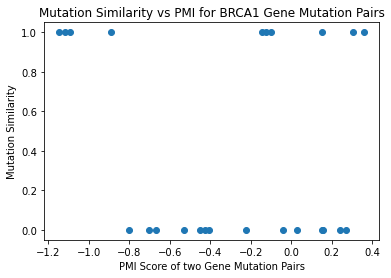

In [33]:
import matplotlib.pyplot, pylab
matplotlib.pyplot.scatter(*zip(*res)) 
plt.title('Mutation Similarity vs PMI for BRCA1 Gene Mutation Pairs')
plt.xlabel('PMI Score of two Gene Mutation Pairs')
plt.ylabel('Mutation Similarity')
matplotlib.pyplot.show()